In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Step 1: Load dataset 
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

In [17]:
# Step 2: Split into features and target
X = data.drop("medv", axis=1).values
y = data["medv"].values

In [18]:
# Step 3: Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [28]:
# Step 4: Linear Regression model from scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=2000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [37]:
# Step 5: Train model
model = LinearRegressionScratch(learning_rate=0.01, epochs=2000)
model.fit(X, y)
y_pred = model.predict(X)


In [38]:
# Step 6: Evaluate performance
mse = np.mean((y - y_pred)**2)

print("Final Weights:", model.w)
print("Final Bias:", model.b)
print("Mean Squared Error:", mse)


Final Weights: [-0.87238699  0.9850421  -0.09445443  0.71502827 -1.93854807  2.73747484
 -0.02853353 -3.05526428  2.04911519 -1.41216449 -2.02450752  0.85006211
 -3.71534787]
Final Bias: 22.532806282115008
Mean Squared Error: 21.954012796047657


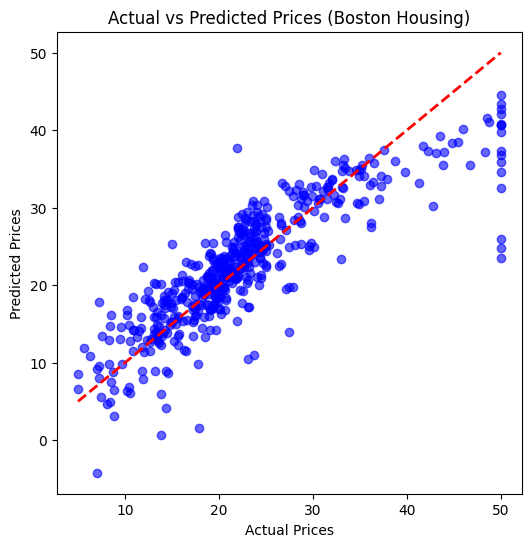

In [39]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # reference line y=x
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Boston Housing)")
plt.show()


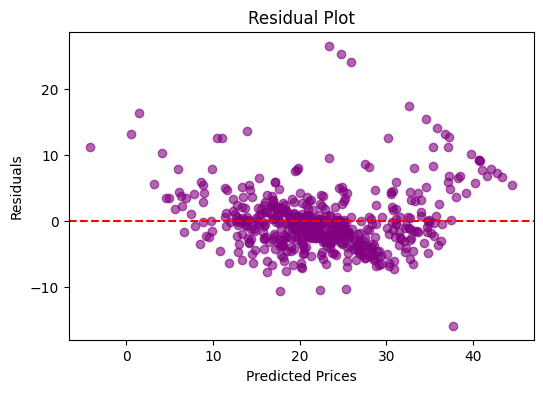

In [40]:
# Residual plot
residuals = y - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [41]:
# Step 7: Calculate R² score
ss_res = np.sum((y - y_pred) ** 2)   # residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)  # total sum of squares

r2 = 1 - (ss_res / ss_tot)
print("R² Score:", r2)


R² Score: 0.7399416225852278


In [42]:
# Step 8: Show final regression equation
features = data.columns[:-1]  # all feature names except target

equation = "Price = "
for i in range(len(model.w)):
    equation += f"({model.w[i]:.4f} * {features[i]}) + "
equation += f"{model.b:.4f}"  # add bias term

print("Final Regression Equation:\n", equation)


Final Regression Equation:
 Price = (-0.8724 * crim) + (0.9850 * zn) + (-0.0945 * indus) + (0.7150 * chas) + (-1.9385 * nox) + (2.7375 * rm) + (-0.0285 * age) + (-3.0553 * dis) + (2.0491 * rad) + (-1.4122 * tax) + (-2.0245 * ptratio) + (0.8501 * b) + (-3.7153 * lstat) + 22.5328


In [43]:
# ------------------- Evaluate Accuracy on a Hold-out Test Set -------------------
np.random.seed(42)

# Shuffle indices
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Split ratio
test_ratio = 0.2
test_size = int(test_ratio * X.shape[0])
test_idx = indices[:test_size]

# Create test set
X_test, y_test = X[test_idx], y[test_idx]

# Predict on test set
y_test_pred = model.predict(X_test)

# Evaluate performance
mse_test = np.mean((y_test - y_test_pred) ** 2)
ss_res_test = np.sum((y_test - y_test_pred) ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)

print("Test Mean Squared Error (on hold-out set):", mse_test)
print("Test R² Score (on hold-out set):", r2_test)


Test Mean Squared Error (on hold-out set): 22.25025888193006
Test R² Score (on hold-out set): 0.6995635394999733


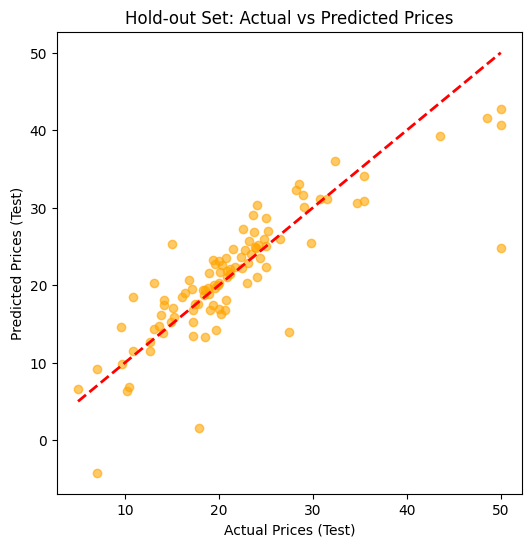

In [44]:
# Optional: Plot Actual vs Predicted on test set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices (Test)")
plt.ylabel("Predicted Prices (Test)")
plt.title("Hold-out Set: Actual vs Predicted Prices")
plt.show()
